# KOSPI

## 기본 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 세팅

In [3]:
# KOSPI 데이터 불러오기 
kospi = pd.read_csv('kospi_data.csv')

### 추세 확인

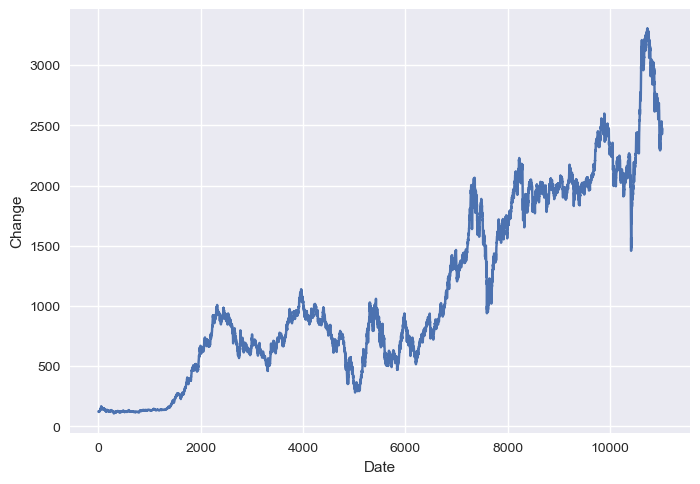

In [9]:
plt.plot(kospi['Close'])


plt.style.use('seaborn')
plt.grid(visible=True, axis='both')

plt.xlabel('Date')
plt.ylabel('Change')

plt.show()

### 추세 제거

In [4]:
#종가를 뒤로 1일 미룬 Close_lag 칼럼 생성
kospi['Close_lag'] = kospi['Close'].shift(1)

#로그수익률 칼럼 생성
kospi['Log_Rate'] = np.log(kospi['Close']/kospi['Close_lag'])
kospi

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667
...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857


In [5]:
kospi['Date'] = pd.to_datetime(kospi['Date'])

kospi['Month'] = [x.month for x in kospi['Date']]
kospi['Day'] = [x.day for x in kospi['Date']]
kospi['Year'] = [x.year for x in kospi['Date']]

kospi['Weekday'] = kospi['Date'].dt.dayofweek
rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()
kospi_change = rate.reset_index()


## 월요일 평균 수익률

Mon = 0, Sun = 6

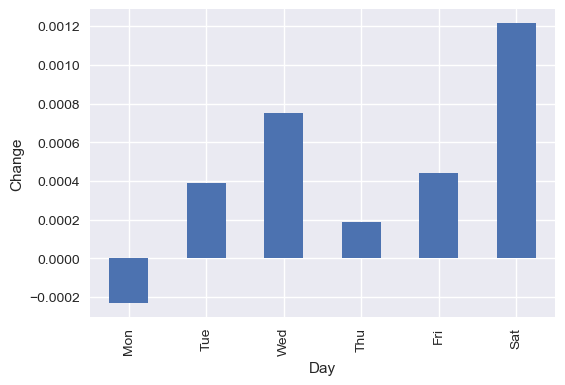

In [10]:
weekday = kospi.groupby('Weekday').mean()
weekday.index = ['Mon','Tue','Wed','Thu','Fri','Sat']

weekday['Change'].plot(kind = 'bar',figsize = (6,4))
plt.xlabel('Day')
plt.ylabel('Change')

plt.show()

월요일에 실제로 평균 수익률이 가장 낮다



0 t-statistics : 0.0, p-value : 0.5
1 t-statistics : -1.3420849695849846, p-value : 0.08982168163487732
2 t-statistics : -2.0516694496759555, p-value : 0.020132952216409615
3 t-statistics : -0.8621463468070545, p-value : 0.19432894810161
4 t-statistics : -1.393284777329257, p-value : 0.08180498187318815
5 t-statistics : -2.4209564543290796, p-value : 0.00777050122791323


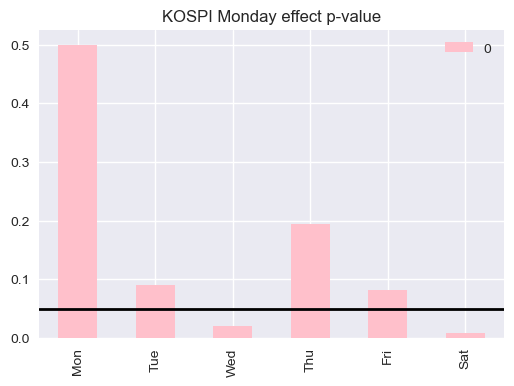

In [12]:
lst = []
for i in range(0, 6): 
  t_stat, p_value = stats.ttest_ind(kospi[kospi['Weekday'] == 0]['Change'], kospi[kospi['Weekday'] == i]['Change'], equal_var=True, alternative= 'less')
  lst.append(p_value)
  print(i, "t-statistics : {}, p-value : {}".format(t_stat, p_value))

lst = pd.DataFrame(lst)
lst.index = ['Mon','Tue','Wed','Thu','Fri', 'Sat']
lst.plot(kind='bar', title = 'KOSPI Monday effect p-value', color = 'pink',
         figsize = (6,4))
plt.axhline(0.05, color='black', lw=2)

plt.show()


In [13]:
t_stat, p_value = stats.ttest_ind(kospi[kospi['Weekday'] == 0]['Change'].dropna(), kospi[kospi['Weekday'] != 0]['Change'].dropna(), equal_var=True, alternative= 'less')
print('p_value :', p_value)

p_value : 0.018139640853102733


월요일, 다른 요일 단측검정 T-test p-value < 0.05: 귀무가설 기각

-> 월요일 평균 수익률 < 다른 요일 평균 수익률 

In [14]:
weekday = pd.DataFrame()
for i in range(0,6): 
  weekday.loc[:,i] = kospi[kospi['Weekday'] == i]['Change'].reset_index().drop(columns = 'index')

for j in range(0,6): # 요일 
  sum = 0
  for i in range(0, len(weekday[j].dropna())): # 요일별 행 
    if weekday.loc[i, j] < 0: 
      sum += 1 
  print(sum / len(weekday[j].dropna()))

0.49876786594381467
0.4948250369640217
0.474592994573261
0.48496796451453916
0.45835386890093643
0.4645760743321719


수익률이 0보다 작을 때를 1로 두고 다 더해서 요일 길이로 나눴을 때는 거의 다 0.5에 수렴. 